In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('airfoil_self_noise.dat',sep="\t",header=None)

# This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.|

In [6]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [9]:
df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement thickness","Scaled sound pressure level"]

In [10]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [12]:
df.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

In [11]:
# first do train and split 

In [14]:
X=df.iloc[:,:-1]

In [16]:
y=df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


In [21]:
import seaborn as sns

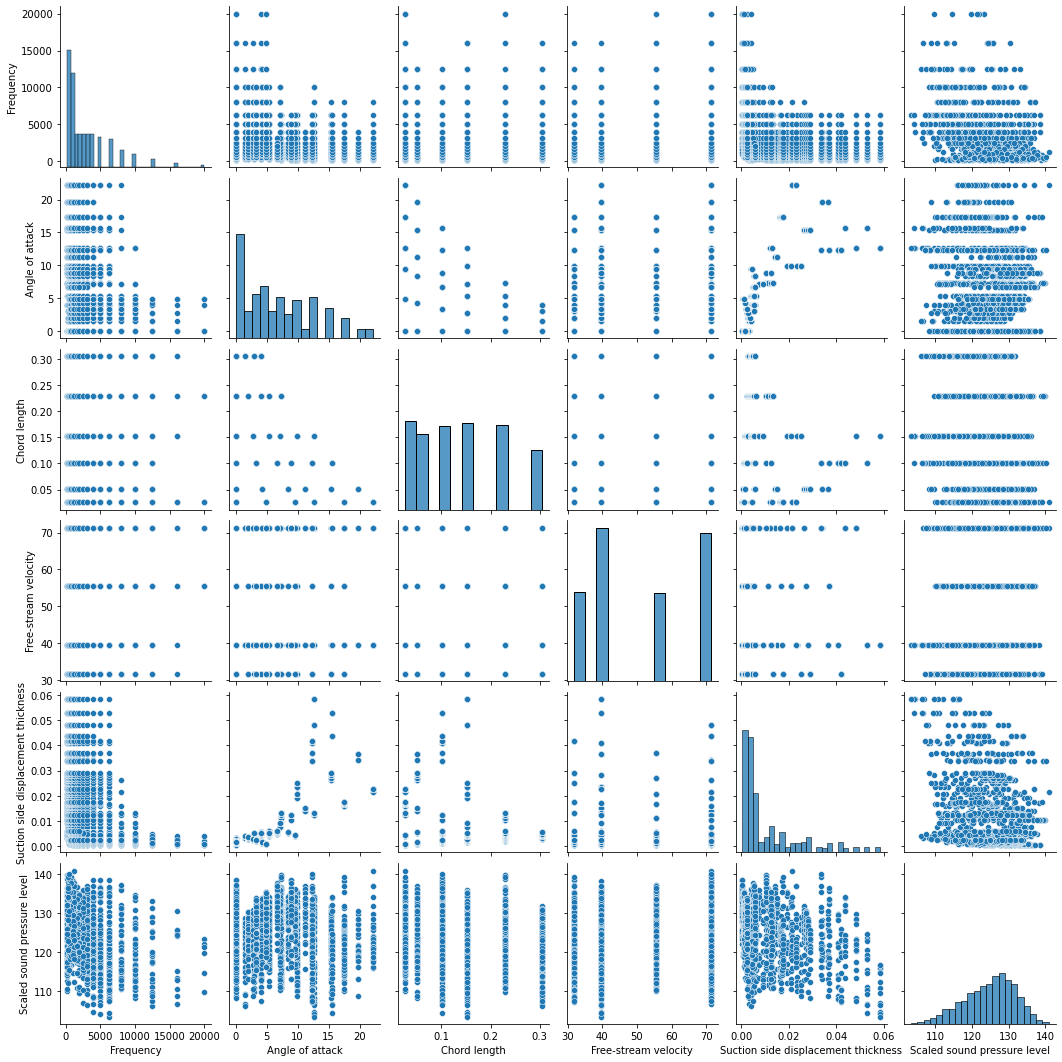

In [22]:
sns.pairplot(df)

In [23]:
import matplotlib.pyplot as plt

In [25]:
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side displacement thickness,-0.239878,0.762567,-0.220849,-0.000519,1.000000


C:\Users\Delll\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

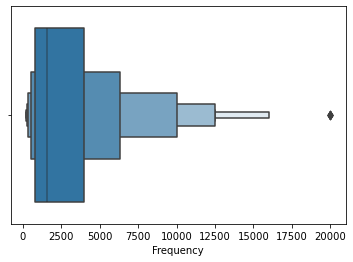

In [26]:
sns.boxenplot(X_train['Frequency'])

C:\Users\Delll\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Angle of attack'>

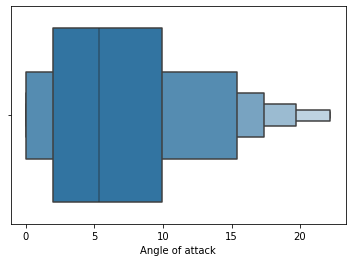

In [27]:
sns.boxenplot(X_train['Angle of attack'])

C:\Users\Delll\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Suction side displacement thickness'>

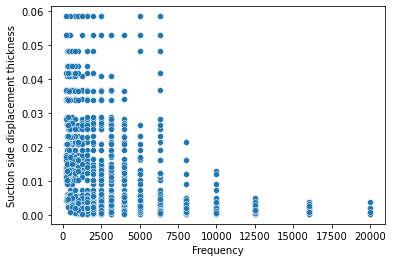

In [28]:
sns.scatterplot(X_train['Frequency'],X_train['Suction side displacement thickness'])

In [32]:
len(y.unique())

1456

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
standard = StandardScaler()

In [35]:
standard.fit(X_train)

StandardScaler()

In [41]:
scaled_feature=standard.transform(X_train)

In [46]:
X_train

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143
...,...,...,...,...,...
1130,250,12.7,0.0254,39.6,0.013025
1294,800,3.3,0.1016,71.3,0.002028
860,630,11.2,0.0508,39.6,0.015048
1459,315,12.3,0.1016,31.7,0.041876


In [47]:
df1=pd.DataFrame(scaled_feature,columns=X_train.columns)

In [48]:
df1

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
0,-0.748090,0.778811,-0.930736,1.273923,0.242729
1,2.164006,-0.314952,-1.200681,0.261122,-0.774978
2,-0.288286,0.095209,0.149046,-0.758089,-0.141279
3,-0.708241,0.009758,-0.390845,-1.264489,-0.385126
4,1.029821,-1.135275,0.958883,1.273923,-0.677035
...,...,...,...,...,...
1002,-0.824725,1.035161,-1.200681,-0.758089,0.162022
1003,-0.656129,-0.571303,-0.390845,1.273923,-0.685920
1004,-0.708241,0.778811,-0.930736,-0.758089,0.317969
1005,-0.804800,0.966801,-0.390845,-1.264489,2.386555


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
L1=LinearRegression()

In [51]:
L1.fit(df1,y_train)

LinearRegression()

In [52]:
L1.predict(X_test)

array([ -1490.39598486,  -5053.38428236, -10223.72382396, -16467.00468756,
       -20590.09766029,  -3151.84925492,  -4019.94641313,  -1860.10240444,
        -1443.58380372,  -5038.21100844,  -3985.81515403, -33103.84386514,
        -6447.85702139,  -6440.76067536,  -6461.40934879, -26051.10634463,
        -3985.7152248 ,  -1139.78526827,  -3928.57241719,  -1470.7414452 ,
       -16455.00359216, -41367.38118747, -20649.79908633,  -1848.3601968 ,
        -1157.63493733, -26023.8127665 ,  -3982.69076546,  -3153.63033664,
       -20642.55457162,   -629.99049856,  -4011.84657349, -33046.86622722,
        -5029.7821204 , -33124.40956627, -16414.52441169,   -615.09990113,
       -10214.03245808,  -1855.66667645, -16493.11989582, -10253.91483333,
       -10173.63666969, -20600.63599793,  -3945.83586557,   -691.60686051,
        -1133.19642086, -16440.21155716,  -3982.52775651, -20624.22551962,
       -41367.54822827, -12879.01209967, -10226.61928233, -33050.68716708,
       -33106.90522851,  

In [55]:
X_test1=standard.transform(X_test)

In [56]:
L1.score(X_test1,y_test)

0.5124474986138434

In [57]:
from sklearn.linear_model import Ridge

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
ridge=Ridge()

In [60]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [61]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [62]:
ridge_regressor.fit(df1,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [63]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-23.60228520434219


In [64]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dt1=DecisionTreeRegressor()

In [78]:
parameters = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best','random'],
    'max_depth' : [2,4,5,3,6]
    
    
}

In [79]:
GV1=GridSearchCV(estimator=dt1,param_grid=parameters,cv=5)

In [80]:
GV1.fit(df1,y_train)

C:\Users\Delll\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Delll\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Delll\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Delll\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Delll\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai

C:\Users\Delll\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Delll\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Delll\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Delll\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Delll\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detai

C:\Users\Delll\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.34062295 0.21454748
 0.5193388  0.41867881 0.59180035 0.4824347  0.44852114 0.31993305
 0.68882862 0.49523174        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.01854915 0.02703734 0.03797197 0.13884403 0.04598102 0.0956521
 0.03460277 0.09348811 0.0395807  0.10841625]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 5, 3, 6],
                         'splitter': ['best', 'random']})

In [81]:
GV1.best_params_

{'criterion': 'friedman_mse', 'max_depth': 6, 'splitter': 'best'}

In [82]:
GV1.best_score_

0.688828623187155

In [83]:
dt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=6,splitter='best')

In [85]:
dt.fit(df1,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6)

In [86]:
dt.score(X_test1,y_test)

0.71227733306128

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
rg1=RandomForestRegressor(n_estimators=10)

In [121]:
rg1.fit(df1,y_train)

RandomForestRegressor(n_estimators=10)

In [122]:
rg1.score(X_test1,y_test)

0.9100238926141434

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
knn = KNeighborsRegressor(n_neighbors=3)

In [108]:
knn.fit(df1,y_train)

KNeighborsRegressor(n_neighbors=3)

In [109]:
knn.score(X_test1,y_test)

0.8141219399681741

In [110]:
from sklearn.svm import SVR

In [111]:
svr = SVR()

In [112]:
svr.fit(df1,y_train)

SVR()

In [113]:
svr.score(X_test1,y_test)

0.6785370996593155